# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [21]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import timeit

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


(-10.0, 10.0)

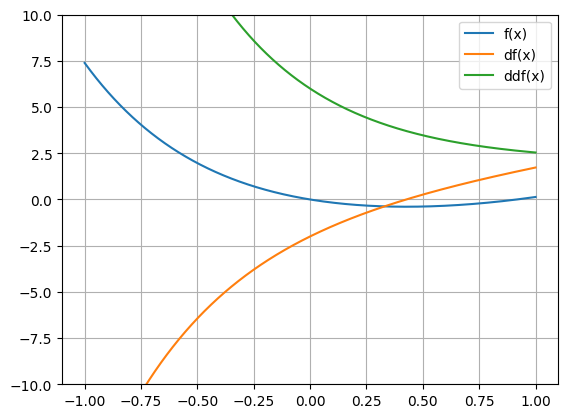

In [2]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1,1,1000)
fig, ax = plt.subplots()
ax.plot(x,main.func(x), label='f(x)')
ax.plot(x,main.dfunc(x), label= 'df(x)')
ax.plot(x,main.ddfunc(x), label= 'ddf(x)')
ax.grid()
ax.legend()
ax.set_ylim(-10,10)
#Przedzialy: [-0.25, 0.25], [0.75,1]

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [3]:
# ===== Twoja implementacja tutaj =====
root_left1 = sp.optimize.root(main.func, np.array([0.0]))
root_right1 = sp.optimize.root(main.func, np.array([1.0]))
print(root_left1.x[0], root_right1.x[0])

root_left2 = sp.optimize.fsolve(main.func, np.array([0.0]))
root_right2 = sp.optimize.fsolve(main.func, np.array([1.0]))
print(root_left2[0], root_right2[0])

0.0 0.9165625831056987
0.0 0.9165625831056987


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Left root methods results:
bisection: 0.0 secant: 3.2590921340500804e-11 newton: 4.9291296482521506e-17
Right root methods results:
bisection: 0.9165625830646604 secant: 0.9165625831002073 newton: 0.916562583105698
Error analysis left root:
Bisection error: 0.0
Secant error: 3.2590921340500804e-11
Newton error: 4.9291296482521506e-17
Error analysis right root:
Bisection error: 4.1038283882244286e-11
Secant error: 5.491385124400949e-12
Newton error: 6.661338147750939e-16


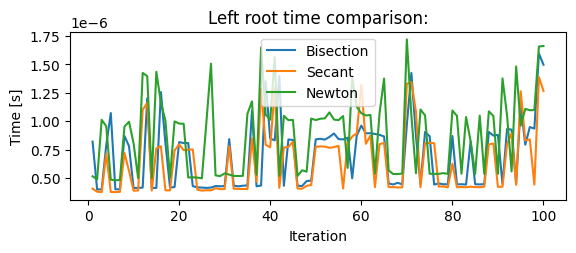

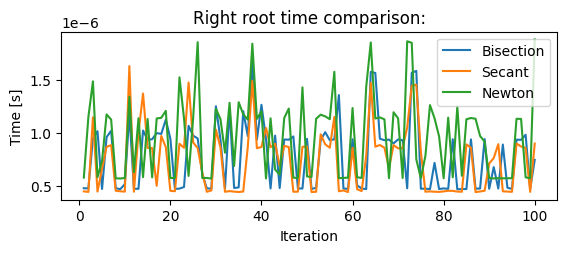

In [36]:
left = (-0.25, 0.25)
right = (0.75, 1.0)
tol = 1e-10
iter = 100
fun = main.func
dfun = main.dfunc
ddfun = main.ddfunc
bisection1 = main.bisection(left[0], left[1], fun, tol, iter )
secant1 = main.secant(left[0], left[1], fun, tol, iter )
newton1 = main.newton(fun, dfun, ddfun, left[0], left[1], tol, iter)
print('Left root methods results:')
print("bisection:", bisection1[0], "secant:", secant1[0], "newton:", newton1[0])

bisection2 = main.bisection(right[0], right[1], fun, tol, iter )
secant2 = main.secant(right[0], right[1], fun, tol, iter)
newton2 = main.newton(fun, dfun, ddfun, right[0], right[1], tol, iter)
print('Right root methods results:')
print("bisection:", bisection2[0], "secant:", secant2[0], "newton:", newton2[0])
print("Error analysis left root:")
print("Bisection error:", abs(bisection1[0]-root_left1.x[0]))
print("Secant error:", abs(secant1[0]-root_left1.x[0]))
print("Newton error:", abs(newton1[0]-root_left1.x[0]))
print("Error analysis right root:")
print("Bisection error:", abs(bisection2[0]-root_right1.x[0]))
print("Secant error:", abs(secant2[0]-root_right1.x[0]))
print("Newton error:", abs(newton2[0]-root_right1.x[0]))

count = np.arange(1, iter+1)
plt.figure()
plt.subplot(2,1,1)
plt.title("Left root time comparison:")
plt.xlabel("Iteration")
plt.ylabel("Time [s]")

left_time = [[], [], []]
right_time = [[],[],[]]
for i in count:
    time = %timeit -n 50 -r 10 -q -o  main.bisection(left[0], left[1], fun, tol, i)
    left_time[0].append(time.average)
    time = %timeit -n 50 -r 10 -q -o main.secant(left[0], left[1], fun, tol, i)
    left_time[1].append(time.average)
    time = %timeit -n 50 -r 10 -q -o main.newton(fun, dfun, ddfun, left[0], left[1], tol, i)
    left_time[2].append(time.average) 
plt.plot(count, left_time[0], label='Bisection')
plt.plot(count, left_time[1], label='Secant')
plt.plot(count, left_time[2], label='Newton')
plt.legend()
plt.show()
plt.subplot(2,1,2)
plt.title("Right root time comparison:")
plt.xlabel("Iteration")
plt.ylabel("Time [s]")
for i in count:
    time = %timeit -n 50 -r 10 -q -o main.bisection(right[0], right[1], fun, tol, i)
    right_time[0].append(time.average)
    time = %timeit -n 50 -r 10 -q -o main.secant(right[0], right[1], fun, tol, i)
    right_time[1].append(time.average)
    time = %timeit -n 50 -r 10 -q -o main.newton(fun, dfun, ddfun, right[0], right[1], tol, i)
    right_time[2].append(time.average)
plt.plot(count, right_time[0], label='Bisection')
plt.plot(count, right_time[1], label='Secant')
plt.plot(count, right_time[2], label='Newton')
plt.legend()
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)